# Cinema Tickets
<h2>Sales Forecasting</h2>
by: <b>Tristan Josh D. Yangco</b><br>
source: https://www.kaggle.com/arashnic/cinema-ticket


<h1>Introduction</h1><br>
<p>Like any other industries such as retail, restaurants, etc., cinema industries are no exception to submit sales reports, and forecast the possibilities of future revenue. Forecasting provides insights to business owners what would be their revenue if they manage to maintain or improve any factors that is integral to their progress.</p>
<p>In this dataset, we gathered eight months sales historical data from different cinemas. Cinemas in this dataset are anonymized</p>
<p>In order to forecast cinema sales, we will use multiple linear regression.

<h2>Importation</h2>
<p>Appropriate statistical libraries were imported for data analysis.</p>
<p>To visualize our data, we will be using matplotlib and seaborn to create heatmaps and a scatter matrix. To build our model, we will be using the sklearn library, and the evaluation will be taking place with the statsmodels library.</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<h2>Loading Data into Pandas</h2>
<p>We've loaded our libraries, so we began loading our dataset as well. Upon loading the dataset, we explored all observations from its head down to its tail. Exploring the dataset is useful for locating duplicate, NaN, or null values, so we can clean the dataset. Fortunately, this sales report has already been cleaned for us.</p>
<p>This dataset is downloaded in Kaggle, an open free dataset repository. Source: https://www.kaggle.com/arashnic/cinema-ticket</p>
<p>To select the data easier, we isolated all string values, and values that were unique, and we set all numeric data to float. And the duration of this dataset is in 8 months time in the year 2018.</p>

In [4]:
cinema = pd.read_csv(r'cinemaTicket_Ref.csv')

cinema.dropna(inplace=True)
cinema.drop(columns = ['film_code', 'cinema_code', 'date'], inplace = True)
cinema = cinema.astype(float)
cinema = cinema.dropna()

cinema

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,3900000.0,26.0,0.0,4.0,4.26,150000.0,26.0,610.328639,5.0,2.0,5.0
1,3360000.0,42.0,0.0,5.0,8.08,80000.0,42.0,519.801980,5.0,2.0,5.0
2,2560000.0,32.0,0.0,4.0,20.00,80000.0,32.0,160.000000,5.0,2.0,5.0
3,1200000.0,12.0,0.0,1.0,11.01,100000.0,12.0,108.991826,5.0,2.0,5.0
4,1200000.0,15.0,0.0,3.0,16.67,80000.0,15.0,89.982004,5.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
142519,1320000.0,22.0,0.0,2.0,3.86,60000.0,22.0,569.948187,11.0,4.0,4.0
142520,1200000.0,15.0,0.0,1.0,65.22,80000.0,15.0,22.999080,11.0,4.0,4.0
142521,1060000.0,8.0,0.0,3.0,9.20,132500.0,8.0,86.956522,11.0,4.0,4.0
142522,600000.0,5.0,0.0,2.0,5.00,120000.0,5.0,100.000000,11.0,4.0,4.0


<h2>Checking for Multicollinearity</h2>
<p>Checking for multicollinearity in this dataset is the key for detecting drawbacks on the data. In this result, I omitted variables that are highly corellated with each other, that way we can determine more variables that could potentially cause issues.</p>
<p>I used corr() function to create a corellation matrix. Then, I added a heatmap for more reference with visualization.</p>

In [3]:
corr = cinema.corr()
display(corr)

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
total_sales,1.000000,0.915147,0.066918,0.510564,0.414418,0.272174,0.915082,0.376134,-0.080256,-0.050990,-0.000674
tickets_sold,0.915147,1.000000,0.071571,0.522499,0.493707,0.103183,0.999946,0.425468,-0.103285,-0.062362,-0.005222
tickets_out,0.066918,0.071571,1.000000,0.078870,0.044407,0.012006,0.061158,0.037599,-0.012468,-0.007221,0.004459
show_time,0.510564,0.522499,0.078870,1.000000,0.055617,0.176227,0.522037,0.681645,-0.023298,-0.020668,0.007631
occu_perc,0.414418,0.493707,0.044407,0.055617,1.000000,0.084666,0.493585,-0.141262,-0.145100,-0.088856,-0.011061
ticket_price,0.272174,0.103183,0.012006,0.176227,0.084666,1.000000,0.103129,0.004287,0.048590,0.042588,0.000972
ticket_use,0.915082,0.999946,0.061158,0.522037,0.493585,0.103129,1.000000,0.425370,-0.103226,-0.062330,-0.005272
capacity,0.376134,0.425468,0.037599,0.681645,-0.141262,0.004287,0.425370,1.000000,-0.025265,-0.023940,0.006255
month,-0.080256,-0.103285,-0.012468,-0.023298,-0.145100,0.048590,-0.103226,-0.025265,1.000000,0.942197,-0.161214
quarter,-0.050990,-0.062362,-0.007221,-0.020668,-0.088856,0.042588,-0.062330,-0.023940,0.942197,1.000000,-0.165583


<AxesSubplot:>

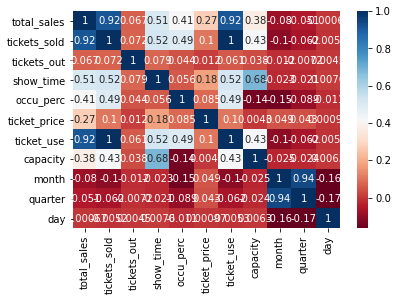

In [4]:
sns.heatmap(cinema.corr(), annot=True, cmap="RdBu")

<p>After looking at the heatmap for highly corellated data, I noticed total_sales and total_sold with a value of 0.92. To interpret this logically, the higher the sales, the more tickets are sold. This is an extremely high corellation that is a candidate for omission.</p>
<p>To locate more highly corellated factors, I used the <em>variance_inflation_factor</em> which is a measure of how much a particular variable is contributing to the standard error in the regression model. When significant multicollinearity exists, the variance inflation factor will be huge for the variables in the calculation.</p>
<p>Generally speaking, if I have a result of 5 above, that factor is to be omitted</p>

In [5]:
cinema_before = cinema
cinema_after = cinema.drop(['total_sales','tickets_sold', 'show_time', 'capacity', 'month', 'quarter'], axis=1)

x1 = sm.tools.add_constant(cinema_before)
x2 = sm.tools.add_constant(cinema_after)

series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index=x1.columns)
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index=x2.columns)

print('Data before')
display(series_before)

print('Data after')
display(series_after)

C:\Users\Tristan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Data before


const           26.941283
total_sales      7.908317
tickets_sold          inf
tickets_out           inf
show_time        2.248294
occu_perc        1.734351
ticket_price     1.310971
ticket_use            inf
capacity         2.261534
month            9.288521
quarter          9.151325
day              1.029669
dtype: float64

Data after


const           10.703011
tickets_out      1.004075
occu_perc        1.324591
ticket_price     1.012322
ticket_use       1.331415
day              1.000150
dtype: float64

<p>Looking at the data above, I noticed that there are values that are higher than 5, some are even reaching an infinite value.
It is a clear example that we are to omit these factors, for they are highly corellated.</p>
<p>One way to demonstrate multicollinearity is to provide a pairplot for visualizing one variable to the other across the dataset</p>

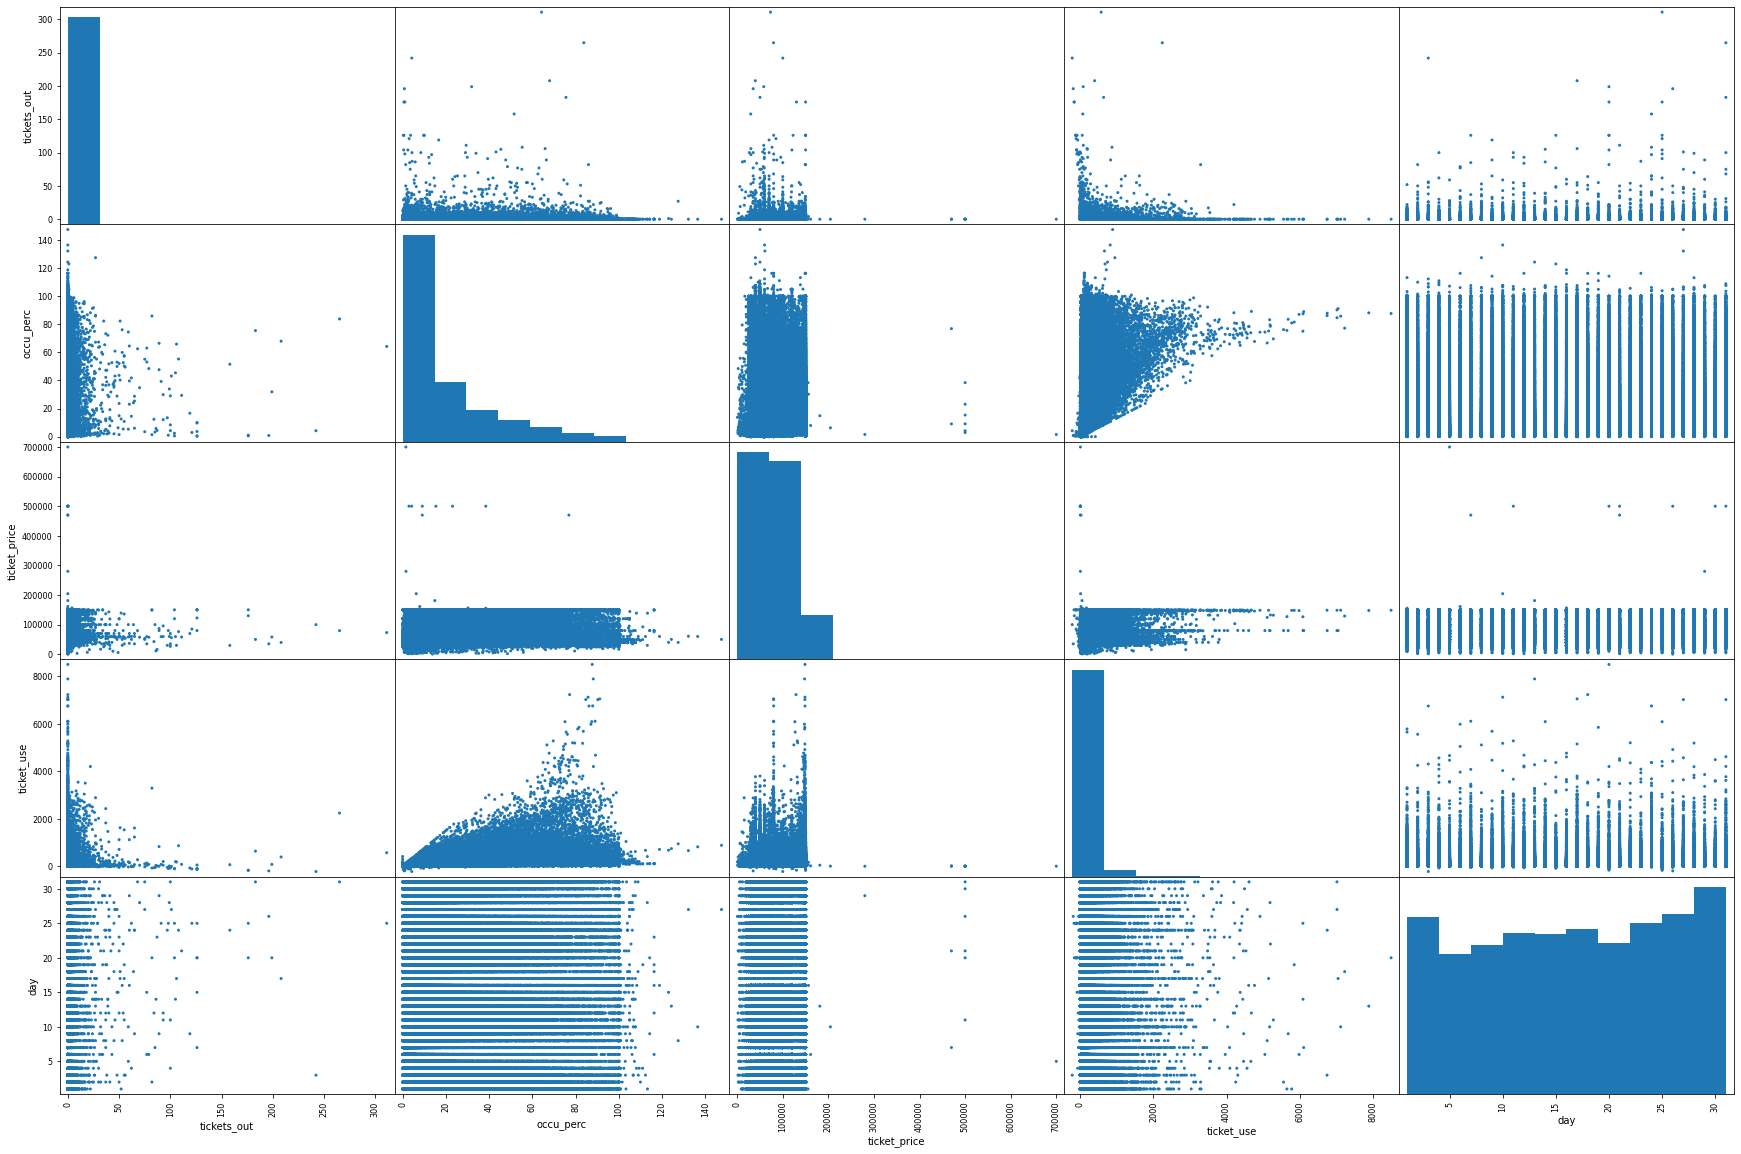

In [6]:
pd.plotting.scatter_matrix(cinema_after, alpha=1,figsize= (30,20))
plt.show()

<h2>Describing the Data Set</h2>
<p>Before assigning x and y variables, further exploration of the dataset is necessary and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the summary data frame, so that it now includes a metric for 3 standard deviations below and above the mean. I stored a new information in my variable, desc_cinema. 

In [7]:
desc_cinema = cinema.describe()

desc_cinema.loc['+3_std'] = desc_cinema.loc['mean'] + (desc_cinema.loc['std']*3)
desc_cinema.loc['-3_std'] = desc_cinema.loc['mean'] - (desc_cinema.loc['std']*3)

desc_cinema

,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,1.423990e+05,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000
mean,1.234773e+07,140.177080,0.237389,3.933883,19.965986,81243.435624,139.939691,854.723605,6.777218,2.634864,16.112220
std,3.063471e+07,279.709174,2.924231,3.056853,22.653445,33237.373278,279.515104,953.118103,2.195050,0.809412,8.948638
min,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1.280000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79459.459460,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1.112000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000
+3_std,1.042519e+08,979.304603,9.010082,13.104441,87.926323,180955.555459,978.485002,3714.077915,13.362368,5.063100,42.958134
-3_std,-7.955641e+07,-698.950443,-8.535303,-5.236675,-47.994350,-18468.684210,-698.605621,-2004.630705,0.192067,0.206628,-10.733694


<p>There are 142,399 observations in the dataset, and it is certain that I have more than enough. However, when we look at
ticket_price, its standard deviation jumps drastically higher than the mean. Just by looking at ticket_price alone, without
looking at the ticket_use and capacity, it is expected that we may have outliers.</p>

In [8]:
# filter the data frame to remove the values exceeding 3 standard deviations
cinema_remove = cinema[(np.abs(stats.zscore(cinema)) < 3).all(axis=1)]

# what rows were removed
cinema.index.difference(cinema_remove.index)

Int64Index([   156,    559,    604,    606,    721,    745,    988,   1095,
              1111,   1128,
            ...
            142210, 142231, 142263, 142299, 142332, 142344, 142386, 142414,
            142452, 142496],
           dtype='int64', length=9702)

All outliers have entered in an error, so I have to ommit them from the dataset. 

<h2>Building the Model</h2>
<p>Now that we've explored our dataset, I will begin building the model. In here, I will define the dependent and the independent variable, and split the data into training and testing set. I set the ration to 30% testing, and 70% training given
the large dataset that we have.</p><br>
<h3>Dependent Variable: </h3>total_sales - The total amount of sales earned in every cinema.
<h3>Independent Variables:</h3>
<ul>
    <li>tickets_out - The number of tickets cancelled</li>
    <li>occu_perc - The number of occupied seats (in percentage)</li>
    <li>ticket_price - The price of ticket at showtime</li>
    <li>ticket_use - The number of tickets used</li>
    <li>day - The number of days the movie was screened</li>
</ul>

In [9]:
cinema_after = cinema.drop(['tickets_sold', 'show_time', 'capacity', 'month', 'quarter'], axis=1)

x = cinema_after.drop('total_sales', axis = 1)
y = cinema_after[['total_sales']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

<h2>Output</h2>
<p>Now with the data fitted to the model, we can now explore the output. We will be looking at the intercept of the model and 
    print each coefficients.</p>

In [10]:
intercept = model.intercept_
print("Intercept: ",intercept)
coefficient = model.coef_[0][0]

for coef in zip(x.columns, model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

Intercept:  [-14052765.46227199]
The Coefficient for tickets_out is 1.3e+05
The Coefficient for occu_perc is -7.4e+04
The Coefficient for ticket_price is 1.7e+02
The Coefficient for ticket_use is 1e+05
The Coefficient for day is 1.1e+04


<p>We can also now make predictions with our newly trained model. In this output, I will call the <em>predict</em> method
and pass some values. </p>

In [11]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[-4029633.53629227],
       [ 2707162.27883213],
       [23677324.66403334],
       [ 5974114.78792866],
       [ 1716338.02678197]])

In [12]:
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
est = model.fit()

<h2>Testing for Autocorrelation</h2>
<p>Again, we will go to our favorite module the statsmodels.stats.diagnostic module, and use the Ljung-Box test for no autocorrelation of residuals. Here:</p>
<ul>
<li>H0: The data are random.</li>
<li>Ha: The data are not random.</li>
</ul>
<p>That means we want to fail to reject the null hypothesis, have a large p-value because then it means we have no autocorrelation. To use the Ljung-Box test, we will call the acorr_ljungbox function, pass through the est.resid and then define the lags.</p>
    

The number of lags will be 10
----------------------------------------------------------------------------------------------------


C:\Users\Tristan\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


The lowest p-value found was 0.0
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


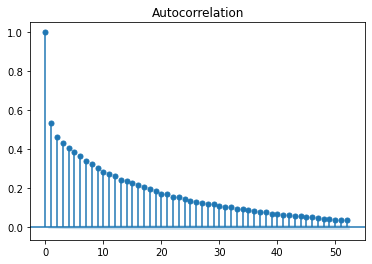

In [13]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(x)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

<h3>Checking the Mean of the Residuals Equals 0</h3>
<p>Additionally, we need to check another assumption, that the mean of the residuals is equal to zero. If the mean is very close to zero, then we are good to proceed. Just a side note, it's not uncommon to get a mean that isn't exactly zero; this is because of rounding errors. However, if it's very close to zero, it's ok. In the example below, you will see that it doesn't come out exactly to zero.</p>

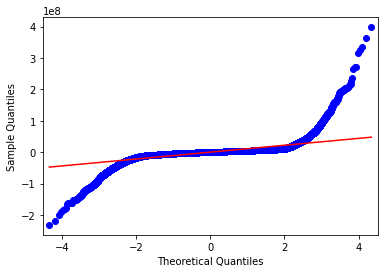

The mean of the residuals is -1.99e-06


In [14]:
import pylab
# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

<h2>R-squared</h2>
<p>The R-squared metric provides the measurement of how well our data fits the model, so the higher R-squared metric, the better the data fits our model. However, one limitation is that R-Square increases as the number of features increase in our model, so if I keep adding variables even if they're poor choices R-Squared will still go up! A more popular metric is the adjusted R-Square which penalizes more complex models, or in other words models with more exploratory variables.

In [15]:
model_r2 = r2_score(y_test, y_pred)
print("R2: {:.2}".format(model_r2))

R2: 0.87


<h2>Measures of Error</h2>
<p>We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:</p>

<ul>
<li>Mean Absolute Error (MAE): Is the mean of the absolute value of the errors. This gives an idea of magnitude but no sense of direction (too high or too low).</li>

<li>Mean Squared Error (MSE): Is the mean of the squared errors. MSE is more popular than MAE because MSE "punishes" more significant errors.</li>

<li>Root Mean Squared Error (RMSE): Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units</li>
</ul>

In [16]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.24e+14
MAE 4.95e+06
RMSE 1.11e+07


<h2>Confidence Intervals</h2>
<p>We interpret confidence intervals by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.</p>

In [17]:
est.conf_int()

,0,1
const,-1.426873e+07,-1.389616e+07
tickets_out,9.321998e+04,1.322436e+05
occu_perc,-8.068491e+04,-7.489911e+04
ticket_price,1.656648e+02,1.691122e+02
ticket_use,1.010465e+05,1.015166e+05
day,5.061660e+03,1.778884e+04


<h3>Hypothesis Testing</h3>
<p>With hypothesis testing, we are trying to determine the statistical significance of the coefficient estimates. This test is outlined as the following.</p>
<br>
Null Hypothesis: There is no relationship between the exploratory variables and the explanatory variable.
Alternative Hypothesis: There is a relationship between the exploratory variables and the explanatory variable.
<br><br>
If we reject the null, we are saying there is a relationship, and the coefficients do not equal 0.<br>
If we fail to reject the null, we are saying there is no relationship, and the coefficients do equal 0

In [18]:
est.pvalues

const           0.000000e+00
tickets_out     1.027573e-29
occu_perc       0.000000e+00
ticket_price    0.000000e+00
ticket_use      0.000000e+00
day             4.333634e-04
dtype: float64

<h3>Summary Output</h3>
    <p>I used <em>statsmodel.api</em> library so I can create the same model as what I did above, and used <em>summary()</em> method to create an output shown below. Some metrics might vary, but they should generally be the same.</p>

In [19]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                 1.939e+05
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:48:19   Log-Likelihood:            -2.5103e+06
No. Observations:              142399   AIC:                         5.021e+06
Df Residuals:                  142393   BIC:                         5.021e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.408e+07    9.5e+04   -148.167   

<h3>Conclusion</h3>
<p>Looking at the output, we now see that all of the independent variables are significant and even our constant is significant.</p>
<p>In this situation, we have 87% accuracy of our dependent and independent variables. Therefore, the total sales are determined on how many people cancelled their ticket, the percentage of occupied seats in the cinema, the ticket price in screen time, the number of tickets used, and how many days the movie was screened.</p>

<h3>Regression Equation</h3>
    
total_sales = 130000(tickets_out) - 74000(occu_perc) + 170(ticket_price) + 100000(ticket_use) + 10000(days) -14052765.46